> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# I: Linear Regression

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code (<span style="color:red">**if not you will get a F grade**</span>).

## Problem description

Let's estimate an exam score for machine intelligence given two other ones for circuits and data structures. Scores for 1,000 students are available ($\texttt{exam_scores.csv}$). You can use $\texttt{linalg.inv}$, transpose, dot operators provided by $\texttt{Numpy}$ when writing codes.

**I. Score distributions**   
(*5 points*) P1.1 Draw a scatter plot for score distributions (X axis: scores for circuits, Y axis: scores for data structures, Z axis: scores for machine intelligence). You can use '$\texttt{scatter}$' from $\texttt{matplotlib.pyplot}$, and '$\texttt{Axes3D}$' from $\texttt{mpl_toolkits.mplot3d}$. 

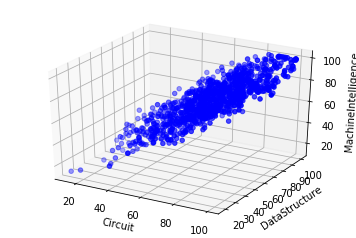

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
from numpy.linalg import inv

df = pd.read_csv('exam_scores.csv')

x1 = df['Circuit']
x2 = df['DataStructure']
x3 = df['MachineIntelligence']

ax = plt.subplot(111, projection='3d') 
ax.scatter(x1, x2, x3, c='b', marker='o')

ax.set_xlabel('Circuit')
ax.set_ylabel('DataStructure')
ax.set_zlabel('MachineIntelligence') 
plt.show()

**II. Linear regression using gradient descent**   
(*40 points*) P2.1 Implement a linear regression method using **gradient descent** and estimate regression coefficients $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively. 

> a. Learning rate = 0.0001   
> b. Number of iterations = 1,000,000    
> c. Loss function = average RSS (i.e., (1/N)*RSS where N(=1,000) is a total number of samples)   
> d. Initialize all weight values to 0.

(*10 points*) P2.2 Plot an average RSS over number of iterations.  
(*10 points*) P2.3 Draw a plane using estimated regression coefficients ($w_0$, $w_1$, $w_2$). You can use $\texttt{plot_wireframe}$ and $\texttt{meshgrid}$. 

In [4]:
lr = 0.0001 # learning rate
it = 1000000 # iteration
w0, w1, w2 = 0, 0, 0 
w = np.array([[w0, w1, w2]]) # weights 

x = np.array([1, x1[0], x2[0]]) # x1 = circuit score / x2 = data structure score
y = np.array([[x3[0]]]) # y = MachineIntelligence score

for i in range(999): # put the 1000 data in array x and y
    xi = np.array([1, x1[i+1], x2[i+1]])
    yi = np.array([[x3[i+1]]])
    x = np.row_stack((x, xi))
    y = np.row_stack((y, yi))

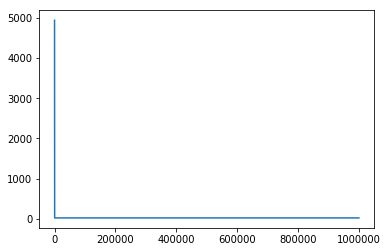

[[-1.46196898  0.09600001  0.91049558]]


In [6]:
#P2.1 & 2.2
def gradient_descent (X,Y,W,LR,IT):
    WT = W.T
    rss = []
    for i in range(IT):
        avg_rss = np.dot((Y - np.dot(X, WT)).T, Y - np.dot(X, WT)) / 1000
        GRSS = np.dot(X.T, Y - np.dot(X, WT)) / 1000
        WT = WT + 2 * LR * GRSS
        rss.append(avg_rss[0][0])
    
    a = np.arange(0,it)
    plt.plot(a, rss)
    plt.show()
    
    return(WT.T)

w_hat1 = gradient_descent(x,y,w,lr,it)
print(w_hat1)

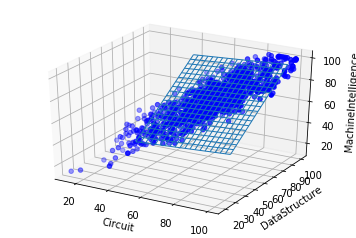

In [28]:
#P2.3
ax = plt.subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c='b', marker='o')
X, Y, Z = axes3d.get_test_data(0.3)
Z = w_hat1[0][0] + w_hat1[0][1] * X + w_hat1[0][2] * Y #equation of y
ax.plot_wireframe(X+70, Y+70, Z+70, linewidth=1)


ax.set_xlabel('Circuit')
ax.set_ylabel('DataStructure')
ax.set_zlabel('MachineIntelligence')
plt.show()

### Description
* P 2.1<br>
gradient descent방식을 이용해 iteration 백 만 번을 수행해서 w0, w1, w2를 구하는 과정이다(for loop).
강의자료 48페이지의 w(t+1)<-w(t)+2nH.T(y-Hw)의 공식을 이용해서 w = [w0, w1, w2]를 구했다.

* P 2.2<br>
average RSS(avg_rss)는 강의자료 26페이지에 있는 (y-Hw).T * (y-Hw)를 이용해 w가 변할때마다 rss라는 리스트에 append해주어 plotting할 수 있었다. iteration이 증가할수록 average RSS가 줄어드는 것을 확인했다.

* P 2.3<br>
Y = w0 + w1x1 + w2x2의 공식을 이용해서 위에서 구한 w값들을 넣어주고 평면을 그렸다. 1번 과제에서 scatter된 데이터와 비슷한 기울기를 가지고 있는 평면이 그려진 것을 볼 수 있다.

**III. Linear regression without iterations**      
(*30 points*) P3.1 Implement a linear regression method without iterations (**closed form soultion**) and estimate weights $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively.   
(*5 points*) P3.2 Draw a plane using estimated regression coefficients and compare it with your plot in P2.3.

In [29]:
#P3.1
def closed_form(X,Y):
    W = np.dot(np.dot(inv(np.dot(X.T, X)), X.T), Y)
    return(W)

w_hat2 = closed_form(x,y).T
print(w_hat2)

[[-1.46243738  0.09600221  0.91049989]]


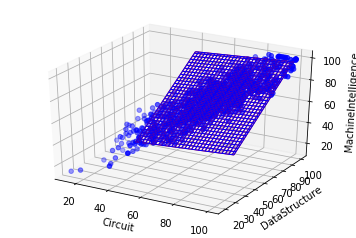

In [30]:
#P3.2
ax = plt.subplot(111, projection='3d')

X, Y, Z = axes3d.get_test_data(0.1)
Z = w_hat1[0][0] + w_hat1[0][1] * X + w_hat1[0][2] * Y
Z1 = w_hat2[0][0] + w_hat2[0][1] * X + w_hat2[0][2] * Y
ax.plot_wireframe(X+70, Y+70, Z+70, linewidth=1, color='b')
ax.plot_wireframe(X+70, Y+70, Z1+70, linewidth=1, color='r')
ax.scatter(x1, x2, x3, c='b', marker='o') #scatter을 이용해 ax 3차원그래프에 데이터 넣기

ax.set_xlabel('Circuit')
ax.set_ylabel('DataStructure')
ax.set_zlabel('MachineIntelligence') 
plt.show()

### Description
* P 3.1<br>
gradient rss를 0로 놓고 구한 w_hat = inverse(H.T * H) * H.T * y 공식을 이용해 iterationd을 이용할 때보다 정확한 w_hat을 구했다.

* P 3.2<br>
P2.3에서의 방식과 동일하게 gradient descent로 구한 w_hat1과 closed-form soultion을 이용해 구한 w_hat2로 plotting을 했다.
w_hat1으로는 파란색 w_hat2로는 빨간색으로 그렸는데 겹쳐져서 보라색이 된 것을 볼 수 있다. 